In [48]:
"""
BETTER RESULT WITHOUT EMBARKED (ABOUT 94.5%)
              WITH EMBARKED (ABOUT 94.2%)  
"""

'\nBETTER RESULT WITHOUT EMBARKED (ABOUT 94.5%)\n              WITH EMBARKED (ABOUT 94.2%)  \n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('train.csv')

In [51]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
dpdata = data.drop(['Name','Cabin','Embarked','Ticket','PassengerId'],axis = 1)
dpdata['Sex'] = dpdata['Sex'].apply(sex_vec)

d = data['Age'].mean()
dpdata['Age'] = dpdata['Age'].fillna(d)

In [53]:
def sex_vec(x):
    if x == 'male':
        return(1)
    else:
        return(0)

    
def emb(x):
    if x == 'S':
        return(0)
    elif x == 'C':
        return(1)
    else:
        return(2)

In [54]:
dpdata.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
1,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [55]:
dpdata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


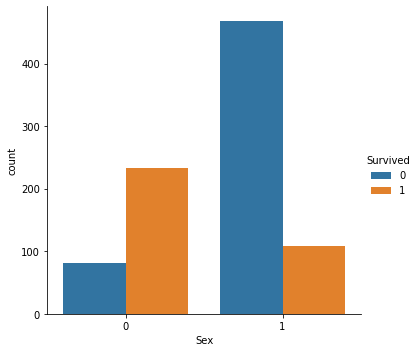

In [56]:
sns.catplot('Sex',data=dpdata,hue='Survived',kind='count')

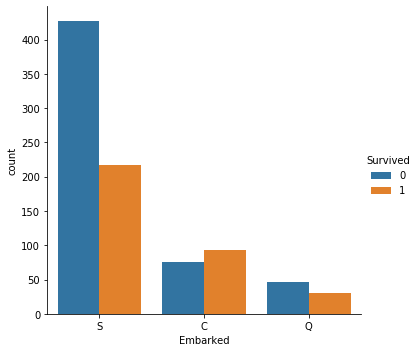

In [57]:
sns.catplot('Embarked',data=data,hue='Survived',kind='count')

In [58]:
x = dpdata.drop(['Survived'],axis = 1)
y = dpdata['Survived']

In [59]:
y.ravel()


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(max_iter = 1000)

In [62]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.score(x,y)

0.797979797979798

In [64]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [65]:
test_data = test_data.drop(['Name','Cabin','Ticket','Embarked','PassengerId'],axis = 1)
test_data['Sex'] = test_data['Sex'].apply(sex_vec)


    

In [66]:
classes = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
for i in classes:
    f = test_data[i].mean()
    test_data[i] = test_data[i].fillna(f)

In [67]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500
414,1,0,39.00000,0,0,108.9000
415,3,1,38.50000,0,0,7.2500
416,3,1,30.27259,0,0,8.0500


In [68]:
pred = model.predict(test_data)

In [69]:
from sklearn import metrics

In [70]:
final = pd.read_csv('gender_submission.csv')
y_final = final['Survived'].ravel()

In [71]:
print(metrics.accuracy_score(y_final,pred))

0.9449760765550239


In [72]:
from sklearn.svm import SVC

In [73]:
new_model = SVC()

In [74]:
new_model.fit(x,y)
new_model.score(x,y)

0.6801346801346801

In [75]:
new_pred = new_model.predict(test_data)


In [76]:
print(metrics.accuracy_score(y_final,new_pred))

0.65311004784689
